In [1]:
import pandas as pd

# Datei einlesen
df = pd.read_excel("../data/raw/PSP_Jan_Feb_2019.xlsx")

# Ersten Eindruck
print(df.shape)

print(df.dtypes)

print(df.head())

# Basisinfos
print(df.info())

print(df.describe(include='all'))

# Fehlende Werte
print(df.isnull().sum())

# Doppelte Einträge
print(df.duplicated().sum())

# Wertebereiche
print(df['amount'].describe())

# Einzigartige Werte
print(df.nunique())



(50410, 8)
Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object
   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  

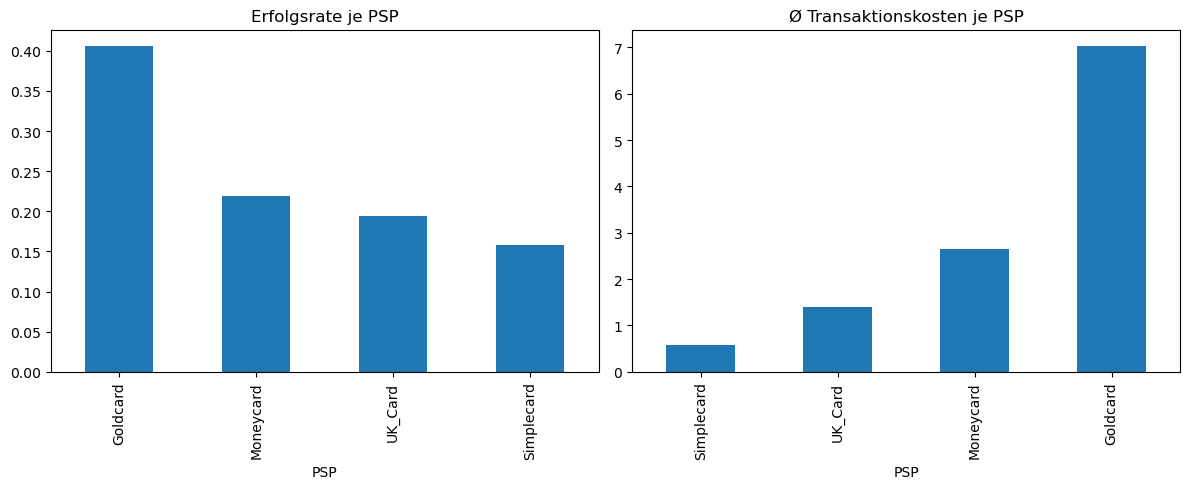

,PSP,success_rate,avg_cost
0,Goldcard,0.406172,7.030860
1,Moneycard,0.218754,2.656261
2,Simplecard,0.158123,0.579062
3,UK_Card,0.194338,1.388677


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei einlesen
df = pd.read_excel("../data/raw/PSP_Jan_Feb_2019.xlsx")

# Transaktionskosten definieren
costs_success = {'Moneycard': 5, 'Goldcard': 10, 'UK_Card': 3, 'Simplecard': 1}
costs_fail = {'Moneycard': 2, 'Goldcard': 5, 'UK_Card': 1, 'Simplecard': 0.5}

df['cost'] = df.apply(
    lambda row: costs_success[row['PSP']] if row['success'] == 1 else costs_fail[row['PSP']], axis=1
)

# Durchschnittliche Kosten pro PSP
avg_cost = df.groupby('PSP')['cost'].mean().sort_values()

# Erfolgsrate pro PSP
success_rate = df.groupby('PSP')['success'].mean().sort_values(ascending=False)

# Visualisierung
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
success_rate.plot(kind='bar', ax=ax[0], title='Erfolgsrate je PSP')
avg_cost.plot(kind='bar', ax=ax[1], title='Ø Transaktionskosten je PSP')
plt.tight_layout()
plt.show()

# Erfolgsrate und Kosten gemeinsam ausgeben
summary_df = pd.DataFrame({
    'success_rate': success_rate,
    'avg_cost': avg_cost
}).reset_index()

display(summary_df)

In [4]:
import pandas as pd

#Datei einlesen (Pfad ggf. anpassen)
df = pd.read_excel("../data/raw/PSP_Jan_Feb_2019.xlsx")

#Unnötige Spalte entfernen
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

#Erfolgsrate nach 3D Secure
success_by_3d = df.groupby('3D_secured')['success'].mean()
print("Erfolgsrate nach 3D-Sicherheitsstatus:")
print(success_by_3d)
print()

#Erfolgsrate nach Kartenanbieter
success_by_card = df.groupby('card')['success'].mean()
print("Erfolgsrate nach Kartenanbieter:")
print(success_by_card)
print()

#Erfolgsrate nach Land
success_by_country = df.groupby('country')['success'].mean()
print("Erfolgsrate nach Land:")
print(success_by_country)
print()

#Binning für Überweisungsbetrag
bins = [0, 100, 200, 300, 400, 700]
labels = ['<100 €', '100–200 €', '200–300 €', '300–400 €', '>400 €']
df['amount_group'] = pd.cut(df['amount'], bins=bins, labels=labels)

#Erfolgsrate nach Betragsgruppe
success_by_amount_group = df.groupby('amount_group', observed=True)['success'].mean()
print("Erfolgsrate nach Betragsgruppe:")
print(success_by_amount_group)
print()

#Korrelationen numerischer Variablen
correlation_matrix = df[['amount', '3D_secured', 'success']].corr()
print("Korrelationsmatrix:")
print(correlation_matrix)


Erfolgsrate nach 3D-Sicherheitsstatus:
3D_secured
0    0.189562
1    0.245525
Name: success, dtype: float64

Erfolgsrate nach Kartenanbieter:
card
Diners    0.222973
Master    0.193883
Visa      0.208505
Name: success, dtype: float64

Erfolgsrate nach Land:
country
Austria        0.204594
Germany        0.201369
Switzerland    0.205746
Name: success, dtype: float64

Erfolgsrate nach Betragsgruppe:
amount_group
<100 €       0.254672
100–200 €    0.238081
200–300 €    0.161781
300–400 €    0.163348
>400 €       0.172507
Name: success, dtype: float64

Korrelationsmatrix:
              amount  3D_secured   success
amount      1.000000    0.000178 -0.086423
3D_secured  0.000178    1.000000  0.059284
success    -0.086423    0.059284  1.000000
